Employee Attrition Prediction

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df = pd.read_csv('/home/icfoss/Downloads/archive(1)/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns',None)

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
df.shape

(1470, 35)

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [18]:
del df['EmployeeCount']
del df['StandardHours']

In [19]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [20]:
df.dropna(inplace=True)

In [21]:
df['EmployeeNumber'].duplicated().sum()

np.int64(0)

In [22]:
del df['EmployeeNumber']

EDA

<Axes: xlabel='Attrition', ylabel='count'>

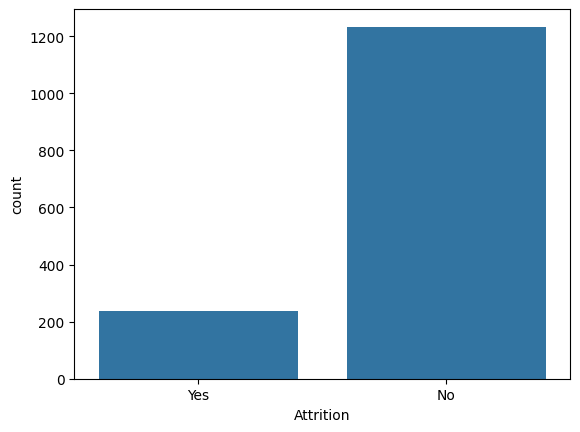

In [23]:
sns.countplot(df,x='Attrition')

Pay not Fair

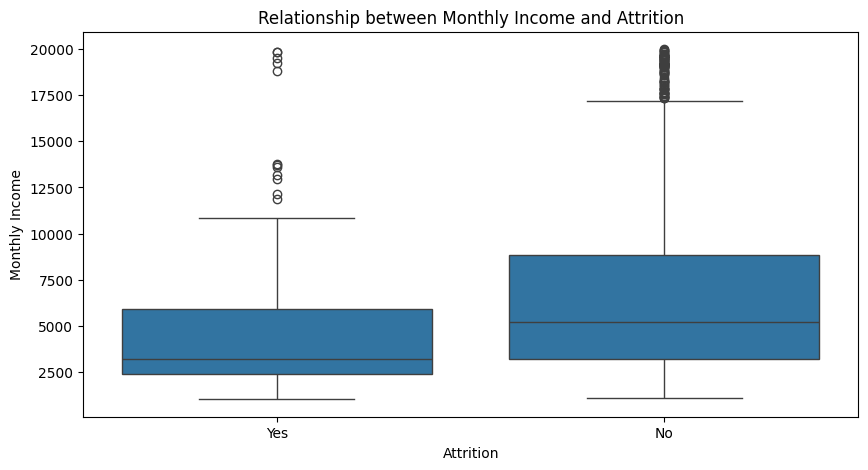

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Relationship between Monthly Income and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

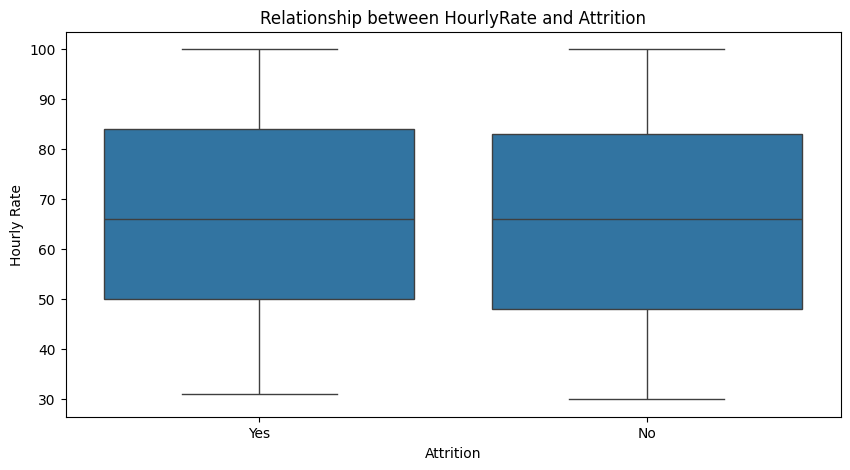

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='HourlyRate', data=df)
plt.title('Relationship between HourlyRate and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Hourly Rate')
plt.show()

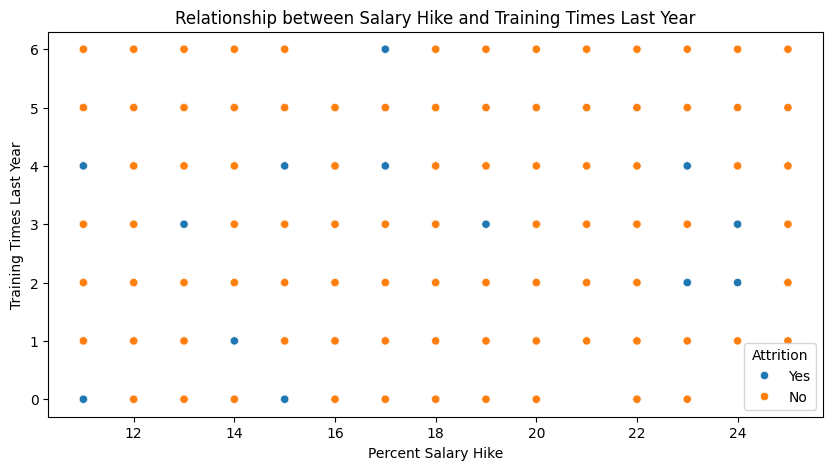

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PercentSalaryHike', y='TrainingTimesLastYear',hue='Attrition', data=df)
plt.title('Relationship between Salary Hike and Training Times Last Year')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Training Times Last Year')
plt.show()


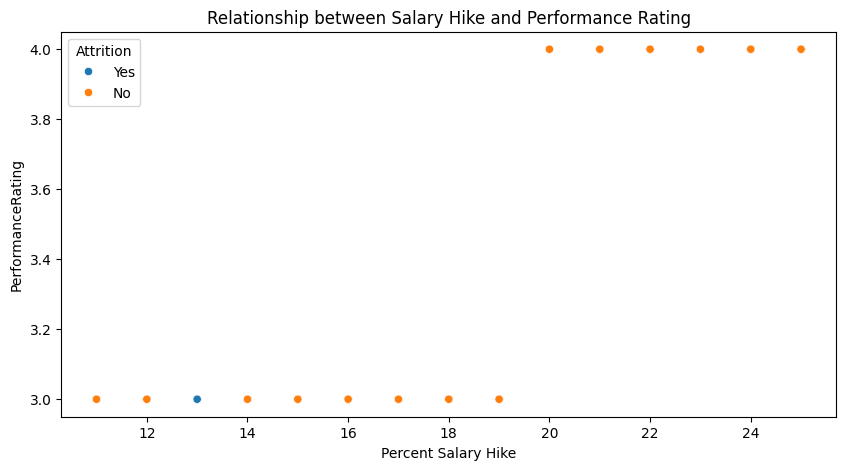

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PercentSalaryHike', y='PerformanceRating',hue='Attrition', data=df)
plt.title('Relationship between Salary Hike and Performance Rating')
plt.xlabel('Percent Salary Hike')
plt.ylabel('PerformanceRating')
plt.show()

/home/icfoss/Downloads/archive(1)/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icfoss/Downloads/archive(1)/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icfoss/Downloads/archive(1)/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icfoss/Downloads/archive(1)/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


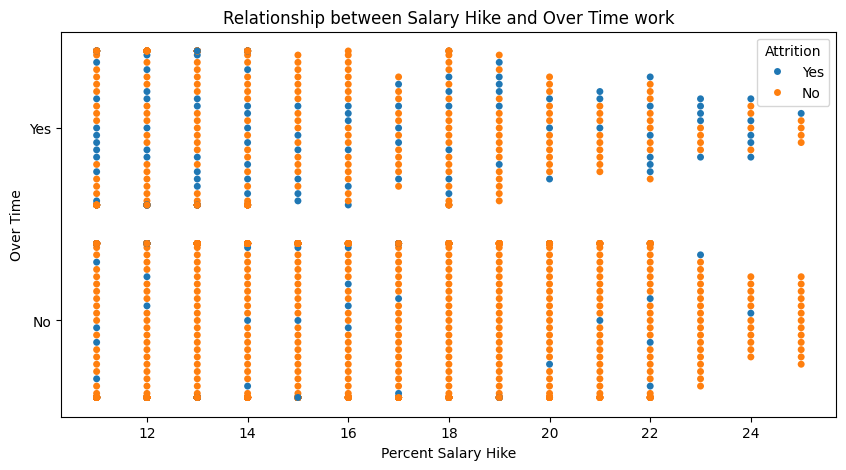

In [28]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x='PercentSalaryHike', y='OverTime', hue='Attrition',data=df);
plt.title('Relationship between Salary Hike and Over Time work')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Over Time')
plt.show()


Employee Life

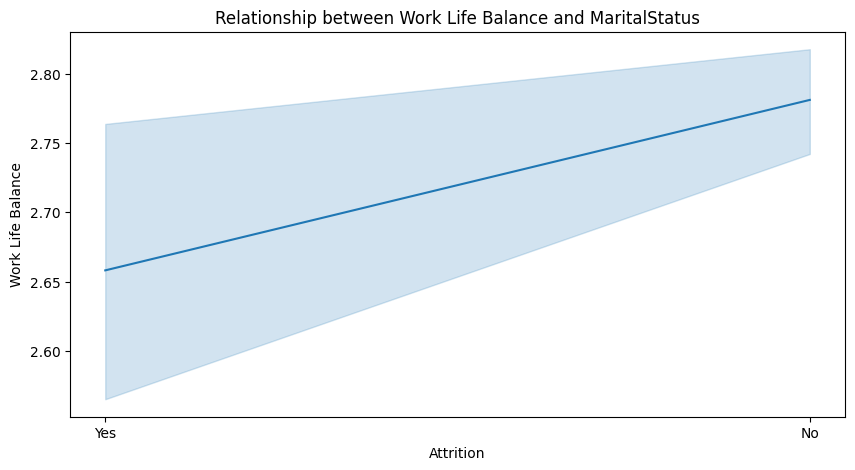

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot( x='Attrition',y='WorkLifeBalance',data=df)
plt.title('Relationship between Work Life Balance and MaritalStatus')
plt.xlabel('Attrition')
plt.ylabel('Work Life Balance')
plt.show()

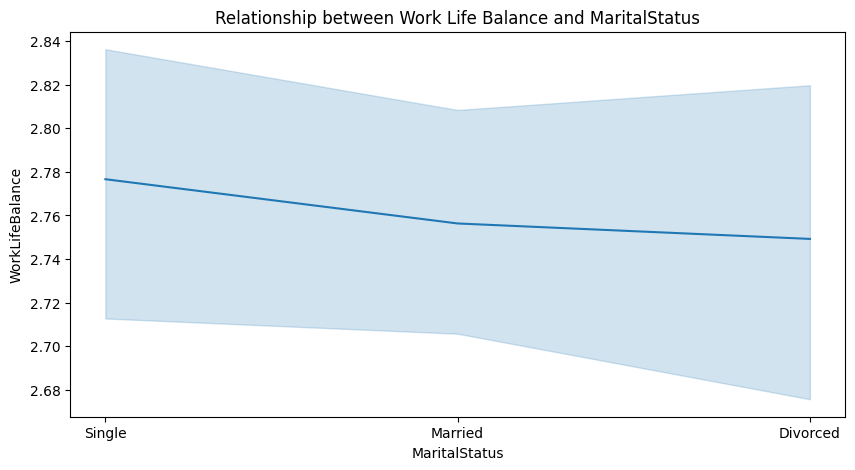

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot( x='MaritalStatus',y='WorkLifeBalance',data=df)
plt.title('Relationship between Work Life Balance and MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()


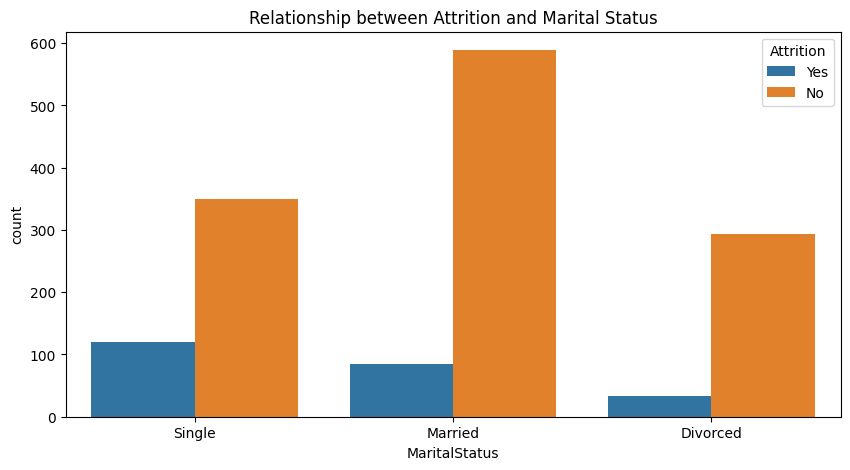

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Relationship between Attrition and Marital Status')
plt.xlabel('MaritalStatus')
plt.ylabel('count')
plt.show()

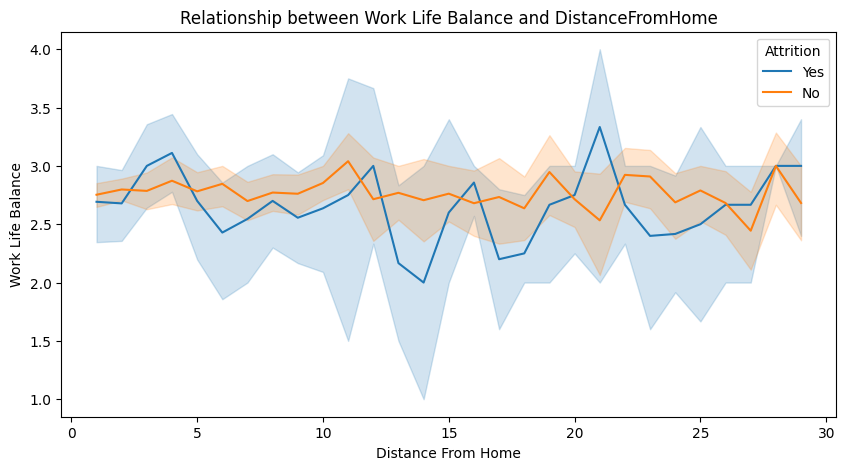

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='DistanceFromHome', y='WorkLifeBalance',hue='Attrition', data=df)
plt.title('Relationship between Work Life Balance and DistanceFromHome')
plt.xlabel('Distance From Home')
plt.ylabel('Work Life Balance')
plt.show()


Lack of opportunity

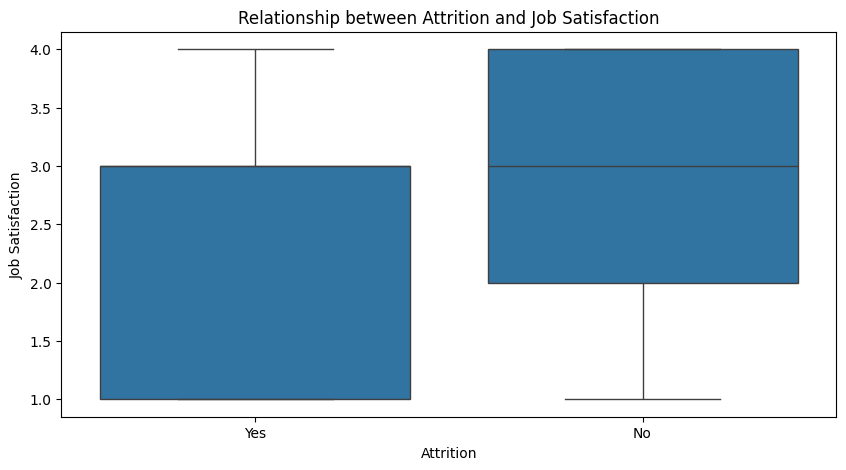

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Relationship between Attrition and Job Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

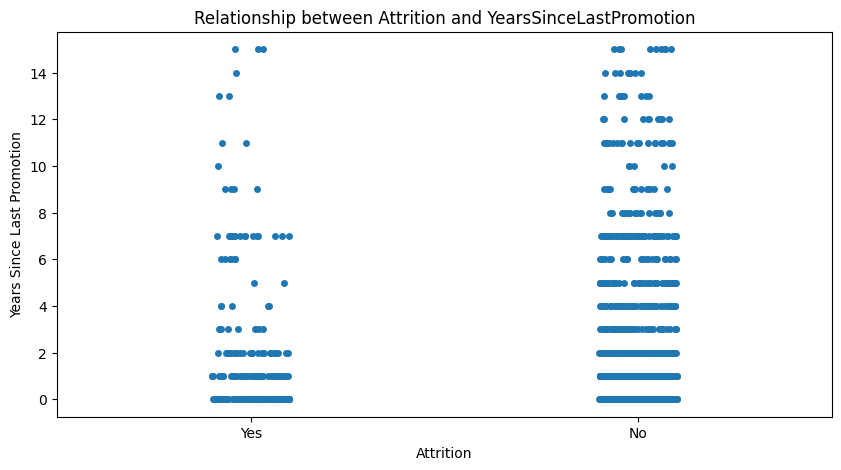

In [34]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Attrition', y='YearsSinceLastPromotion', data=df, jitter=True)
plt.title('Relationship between Attrition and YearsSinceLastPromotion')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

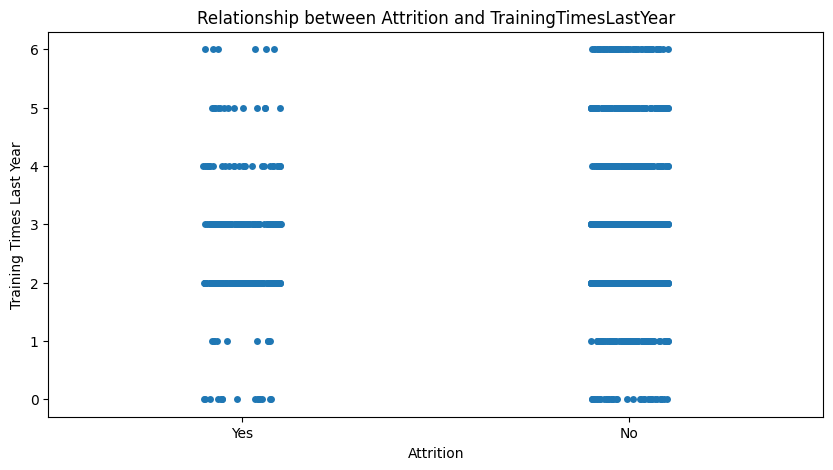

In [35]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Attrition', y='TrainingTimesLastYear', data=df, jitter=True)
plt.title('Relationship between Attrition and TrainingTimesLastYear')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')
plt.show()

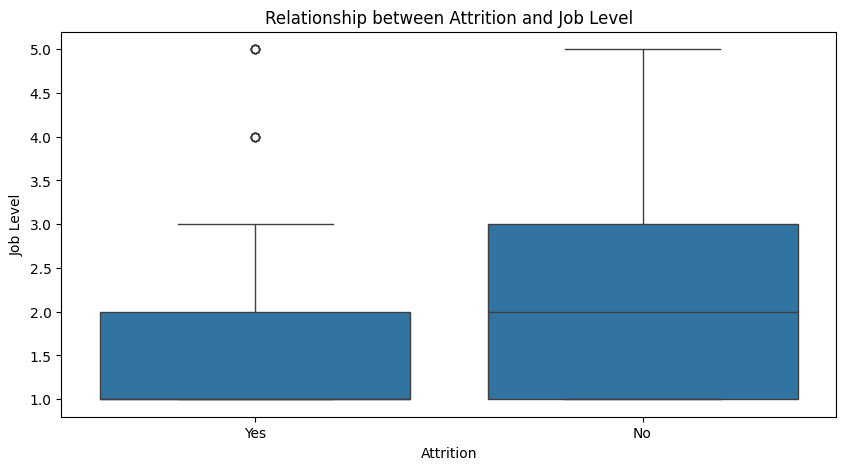

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='JobLevel', data=df)
plt.title('Relationship between Attrition and Job Level')
plt.xlabel('Attrition')
plt.ylabel('Job Level')
plt.show()

Bad workplace culture

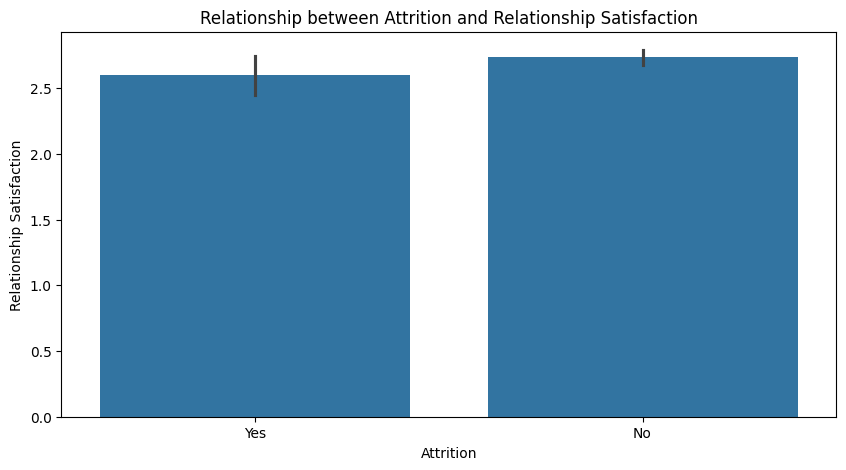

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Attrition', y='RelationshipSatisfaction', data=df)
plt.title('Relationship between Attrition and Relationship Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Relationship Satisfaction')
plt.show()

/tmp/ipykernel_23119/1348579427.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Attrition', y='EnvironmentSatisfaction', data=df, ci=None)


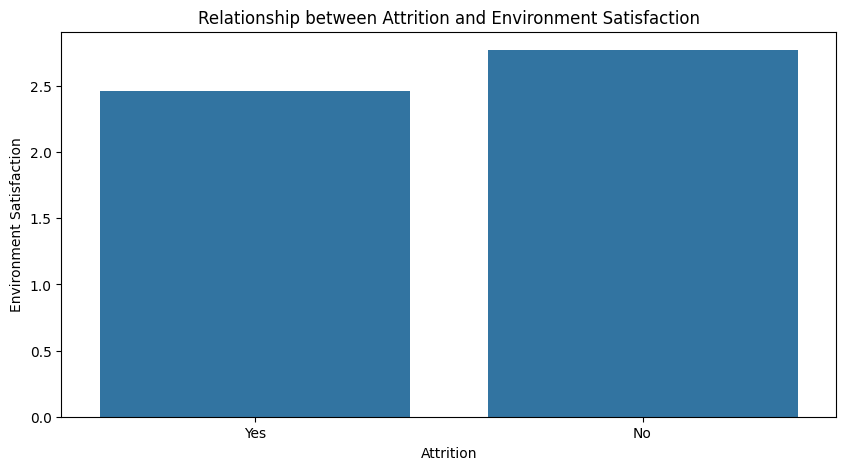

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Attrition', y='EnvironmentSatisfaction', data=df, ci=None)
plt.title('Relationship between Attrition and Environment Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.show()

In [39]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'Over18', 'OverTime','JobRole']
for col in categorical_columns:
    print(f"{df[col].value_counts()}\n")

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64



In [40]:
del df['Over18']
categorical_columns.remove('Over18')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

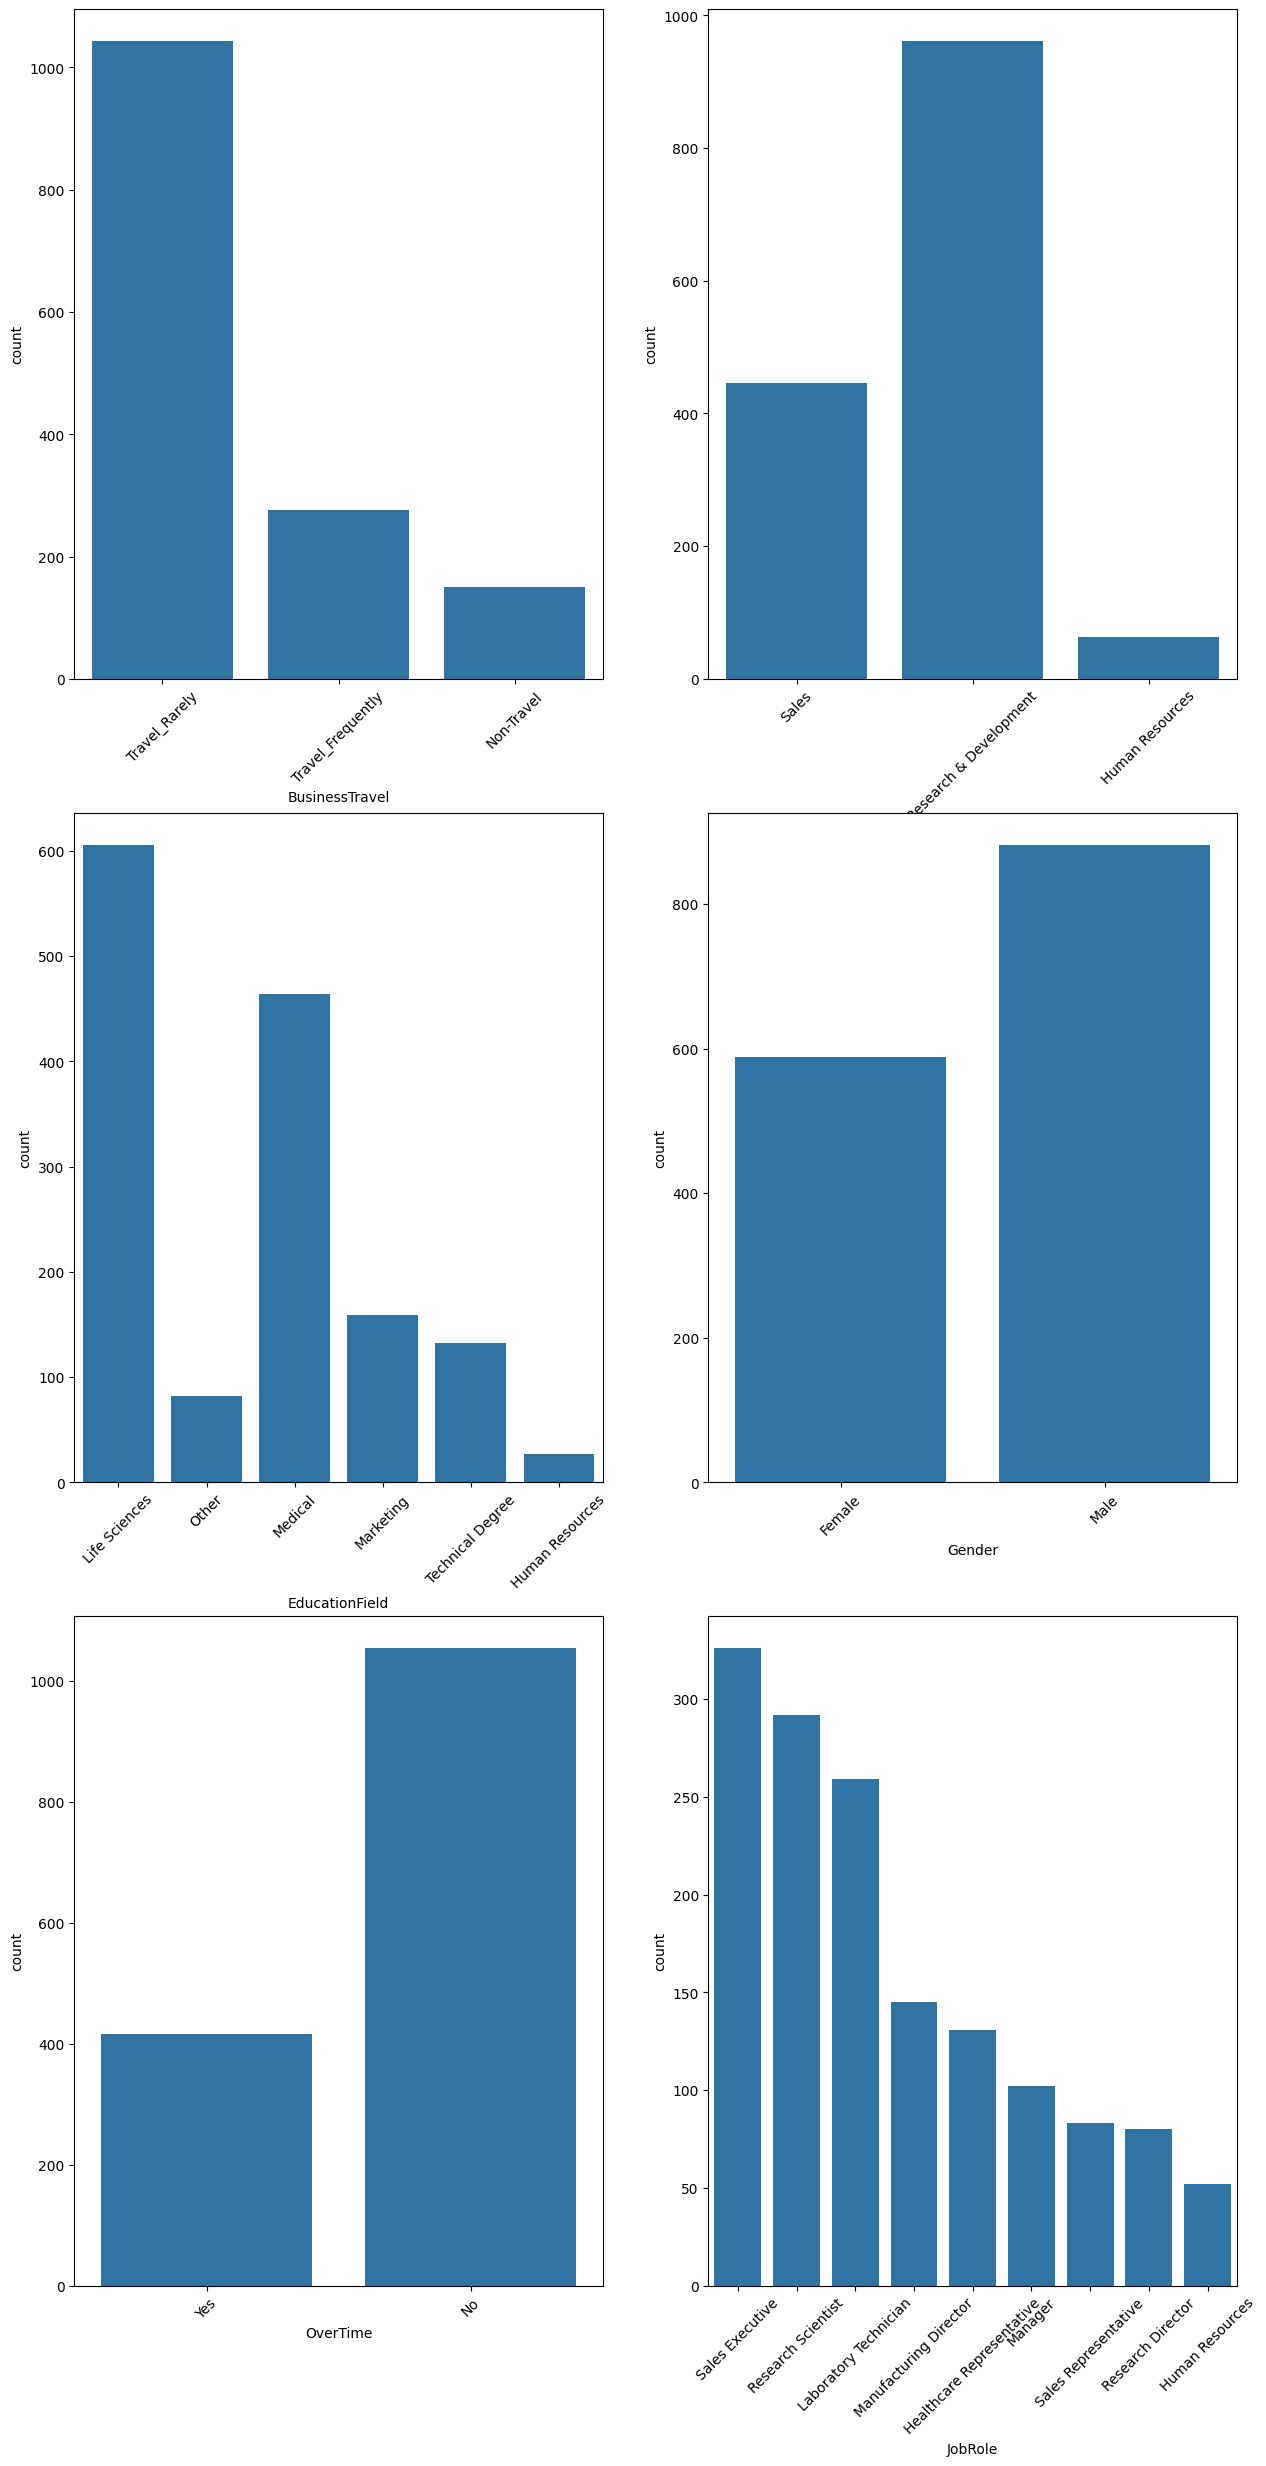

In [41]:
fig,axes = plt.subplots(4,2,figsize=(15,40))
col=0
for i in range(4):
    for j in range(2):
        if col >= len(categorical_columns):
            axes[i,j].set_visible(False) 
            continue
        sns.countplot(ax=axes[i, j],data=df, x=categorical_columns[col])
        axes[i,j].tick_params(axis='x', rotation=45)
        col+=1

plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

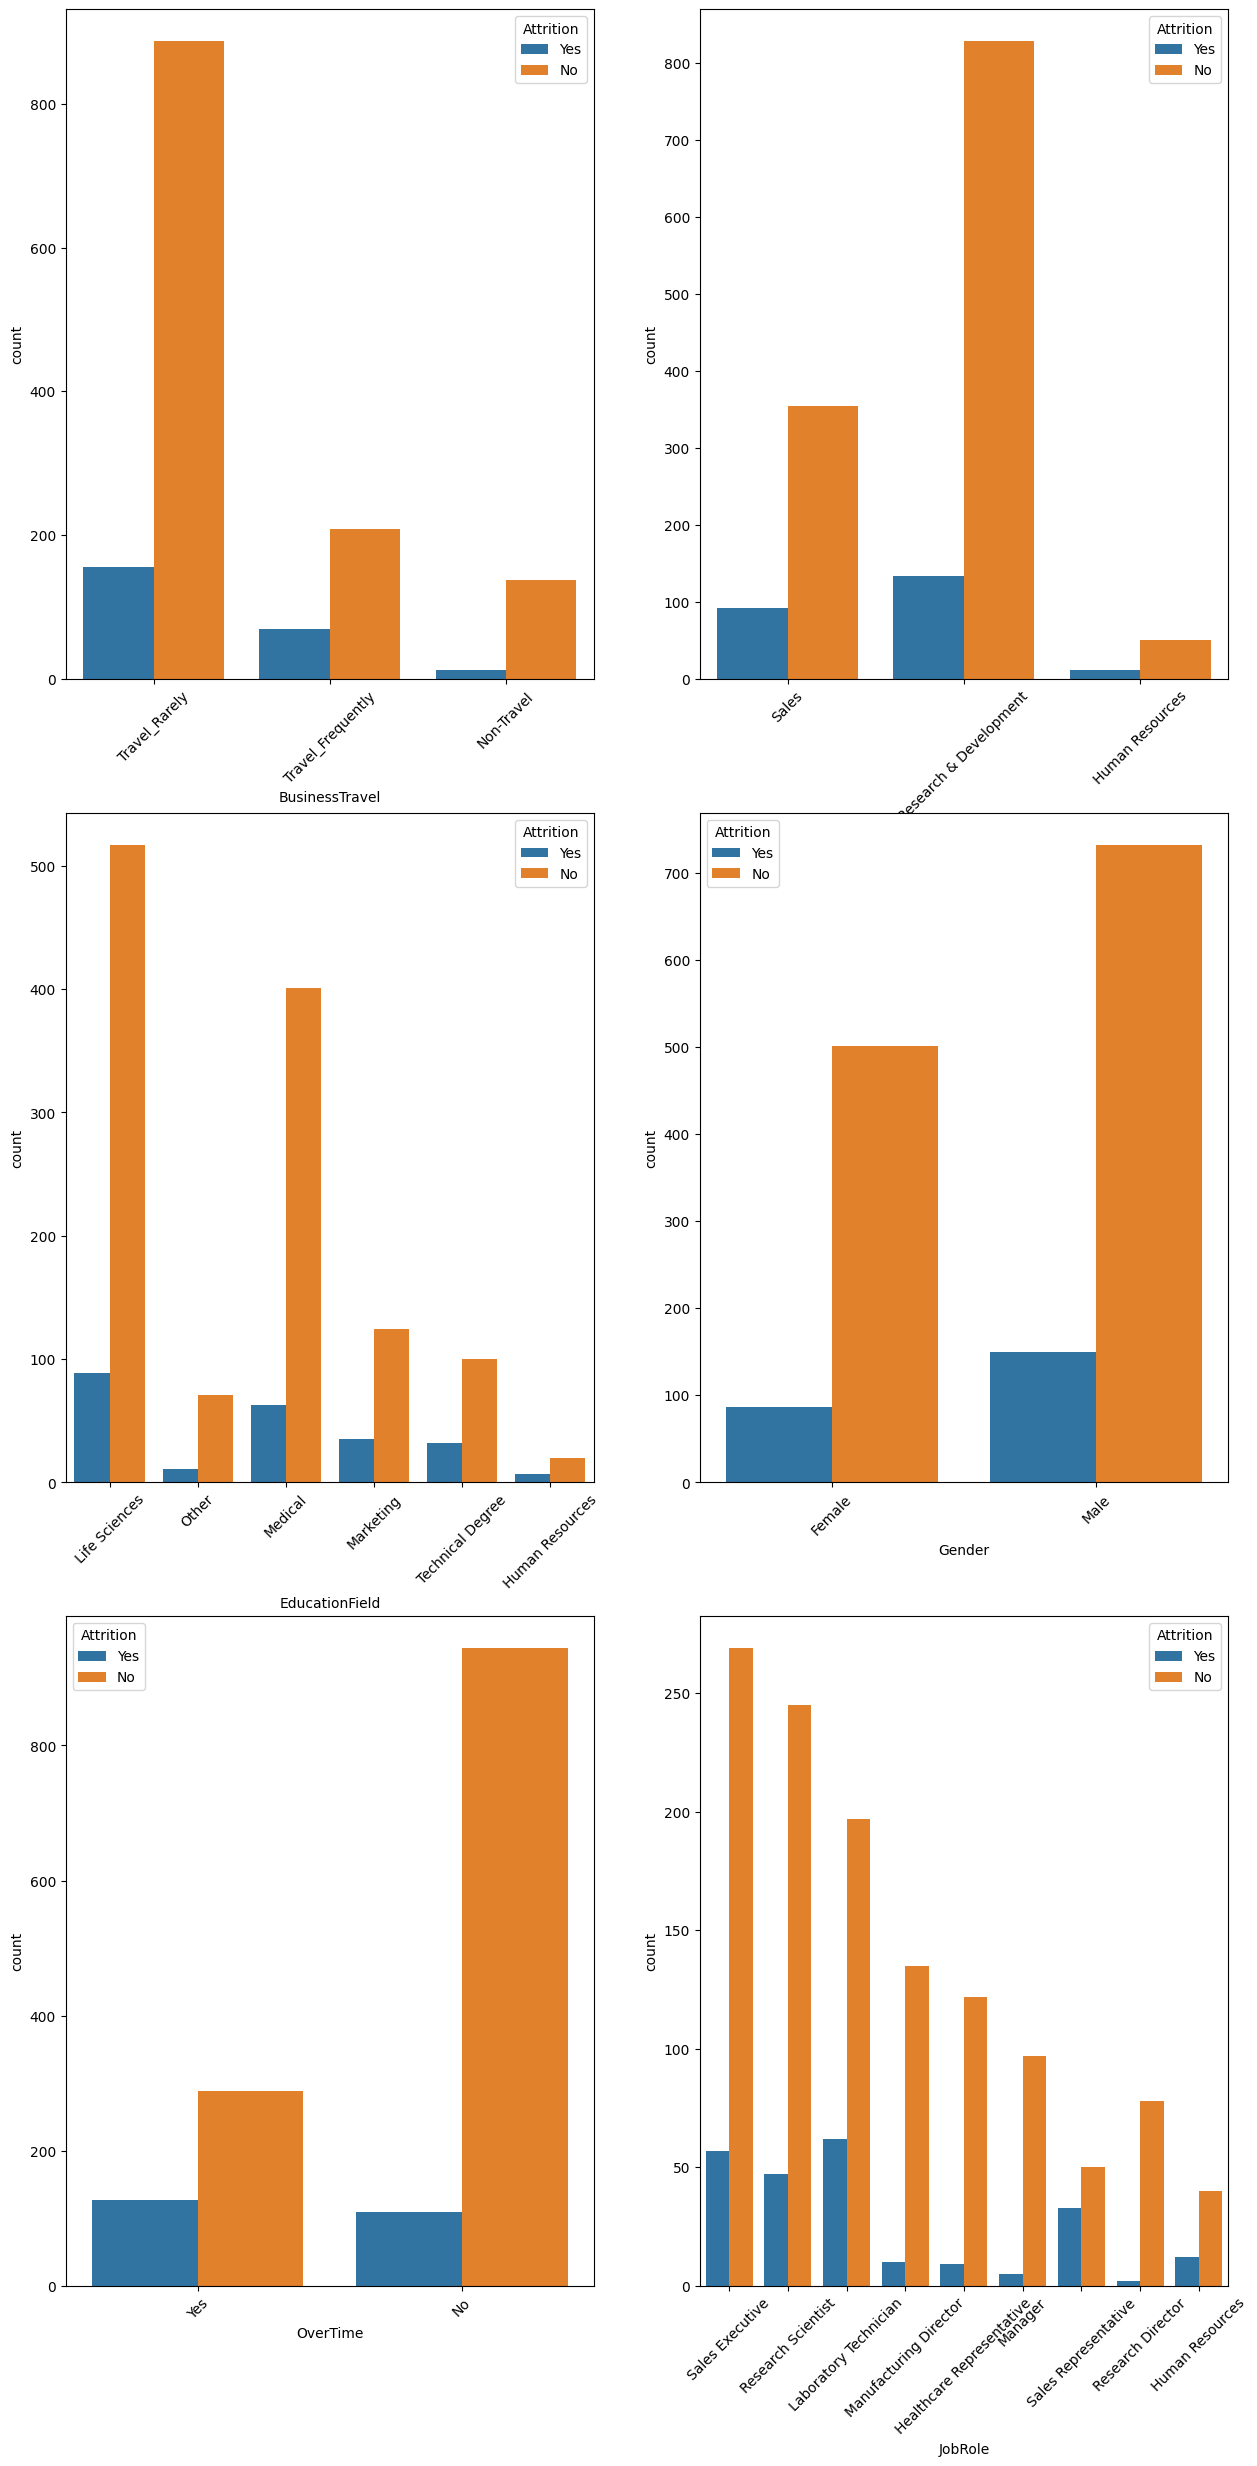

In [42]:
fig,axes = plt.subplots(4,2,figsize=(15,40))
col=0
for i in range(4):
    for j in range(2):
        if col >= len(categorical_columns):
            axes[i,j].set_visible(False) 
            continue
        sns.countplot(ax=axes[i, j],data=df, x=categorical_columns[col],hue='Attrition')
        axes[i,j].tick_params(axis='x', rotation=45)
        col+=1

plt.tight_layout

Encoding

In [43]:
df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced':0,'Single':1,'Married':2})

In [44]:
department_dummies = pd.get_dummies(df['Department'], prefix='Department',drop_first=True)
education_field_dummies = pd.get_dummies(df['EducationField'], prefix='EducationField',drop_first=True)
job_role_dummies = pd.get_dummies(df['JobRole'], prefix='JobRole',drop_first=True)

df = pd.concat([df, department_dummies], axis=1)
df = pd.concat([df, education_field_dummies], axis=1)
df = pd.concat([df, job_role_dummies], axis=1)

In [45]:
del df['Department']
del df['EducationField']
del df['JobRole']

Split the dataset

In [51]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

Imbalance target

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X,y = ros.fit_resample(X,y)


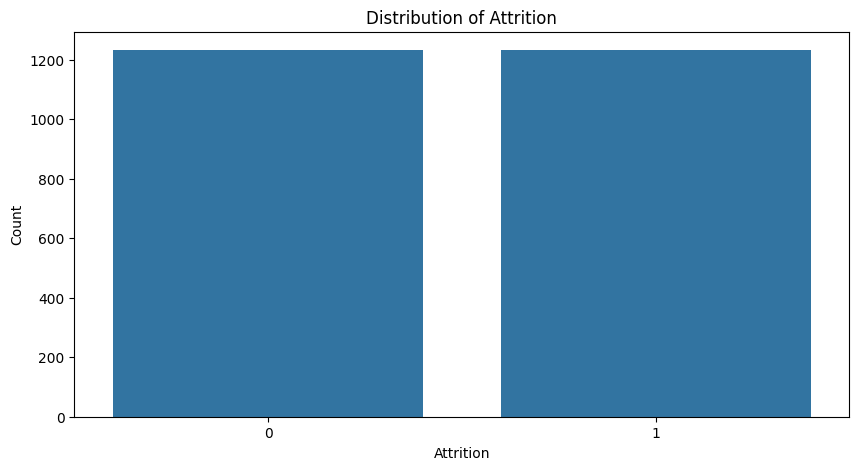

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Scaling the dataset

In [54]:
scaler_standard = StandardScaler()
X = scaler_standard.fit_transform(X)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modelling

In [56]:
gb = GradientBoostingClassifier(n_estimators=200)
gb.fit(X_train, y_train)
train_acc = gb.score(X_train, y_train)
test_acc = gb.score(X_test, y_test)

print(f"Gradient Boosting: Training: {train_acc} - Testing: {test_acc}")

Gradient Boosting: Training: 0.9787018255578094 - Testing: 0.9190283400809717


In [57]:
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[223  27]
 [ 13 231]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       250
           1       0.90      0.95      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [67]:
X_train[0]

array([-0.98739882,  0.61400946, -0.78391525,  1.76602491,  0.11290511,
        0.30821638, -0.7889033 ,  0.02598071, -2.22201998, -0.82772308,
        1.21329211, -0.29918106, -0.78163468,  1.2134977 , -0.70949117,
        1.2546365 ,  0.76407248, -0.4294625 , -0.59307319, -0.79921156,
       -1.17813743,  0.21667291, -2.21609818, -0.85080784, -1.04047993,
       -0.65416988, -1.03992851,  0.77879051, -0.70775205, -0.80865539,
       -0.36791183, -0.66427586, -0.22616564,  2.88195426, -0.20235006,
        1.93686476, -0.22517332, -0.28478901, -0.19907035, -0.50683403,
       -0.53953635, -0.31531004])

In [97]:
d = X_test[1].reshape(1,-1)

In [98]:
d.shape

(1, 42)

In [99]:
d

array([[-0.03265088,  0.61400946, -1.20125337,  2.13414788,  0.11290511,
         0.30821638, -0.7889033 ,  0.9178846 ,  0.48859158,  0.11377374,
         1.21329211, -0.29918106,  0.00562592, -0.14582034, -0.70949117,
         1.2546365 ,  0.76407248, -0.4294625 ,  1.21027884, -0.79921156,
        -0.00517932, -0.55882114,  0.37943643,  0.62222666,  0.93714224,
         1.55092298,  1.01681369, -1.28404235,  1.4129242 ,  1.23662071,
        -0.36791183, -0.66427586, -0.22616564, -0.34698677, -0.20235006,
        -0.51629831, -0.22517332, -0.28478901, -0.19907035, -0.50683403,
         1.85344323, -0.31531004]])

In [100]:
pred = gb.predict(d)

In [101]:
val = pred.tolist()

In [102]:
val[0]

1

In [103]:
if val[0] == 0:
    print("Employee satisfied with company")
else:
    print("Employee is not satisfied with company")
    

Employee doesnt satisfied with company
